Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### there is no null in dataset

<Axes: >

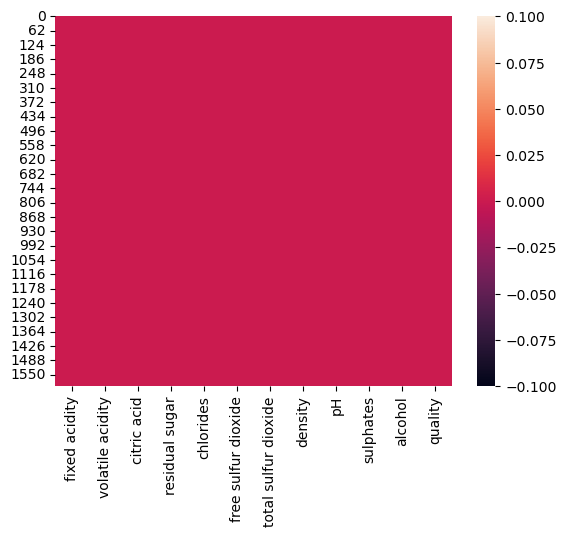

In [5]:
sns.heatmap(df.isnull())#visualising it with heatmap which shows 0 null value is there

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## observation
### nonull
### mean is greater than median in most column-right skewness
### outlieres in  fixed acidity,residualsugar,free sulfurdioxide,total sulfurdioxide column because big difference between 3rd quartile and max

## visualization

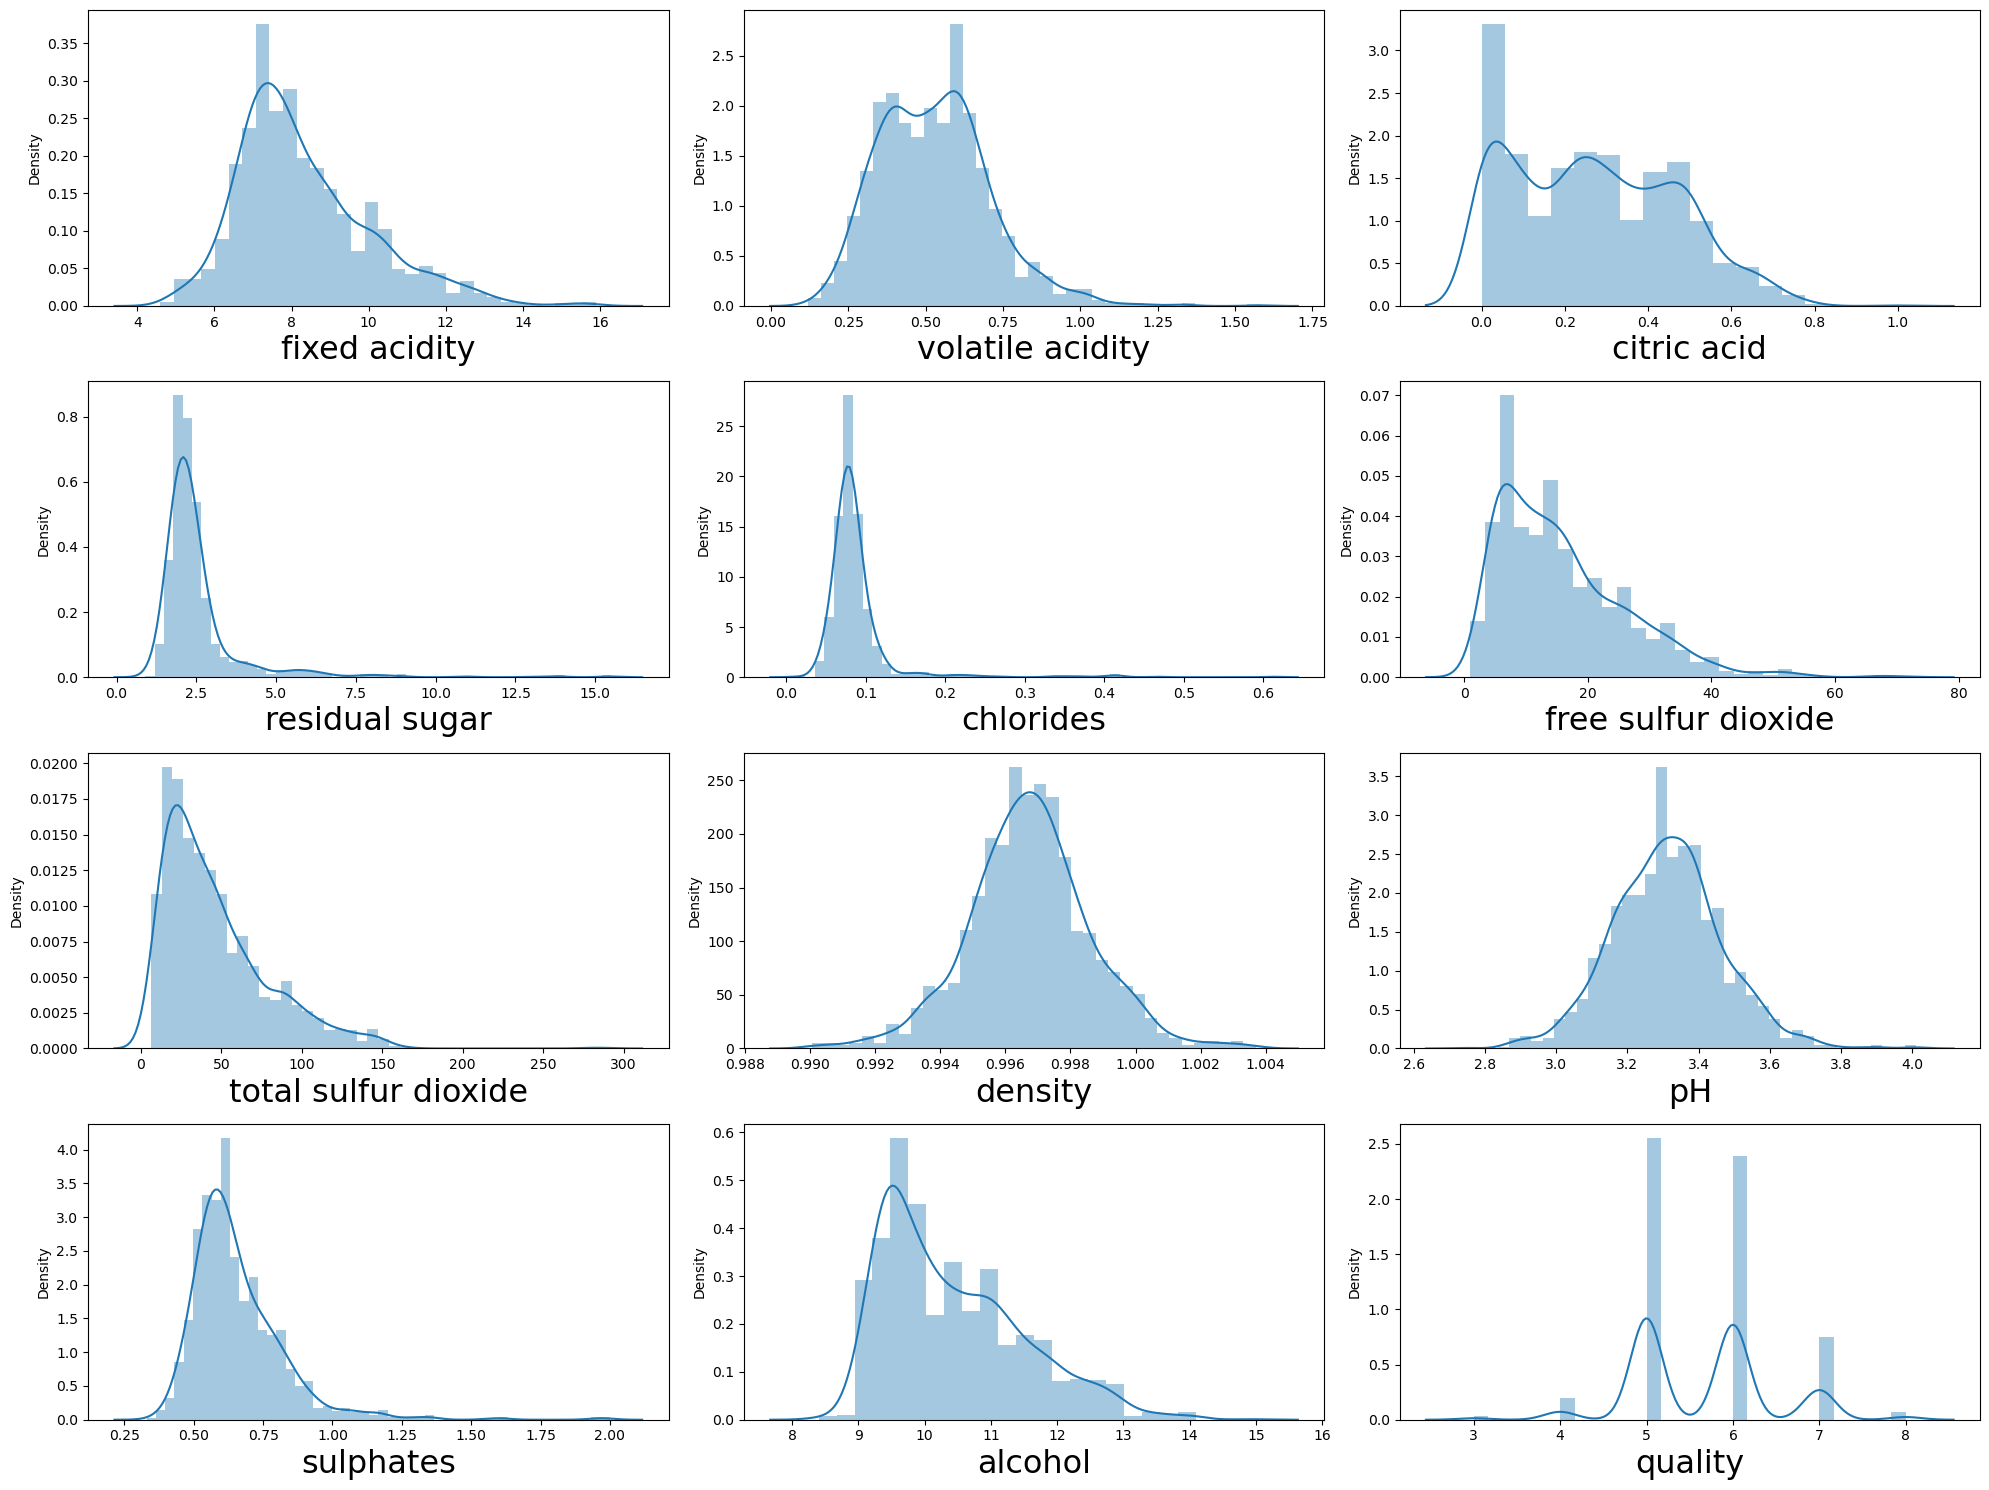

In [7]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=23)
    plotnumber+=1
plt.tight_layout()

above are distribution plot which shows distibution of data some column have skewness like residual sugar, chlorides, free sulfurdioxide,total sulfar dioxide,sulphates,and alcohol
quality is our target column 

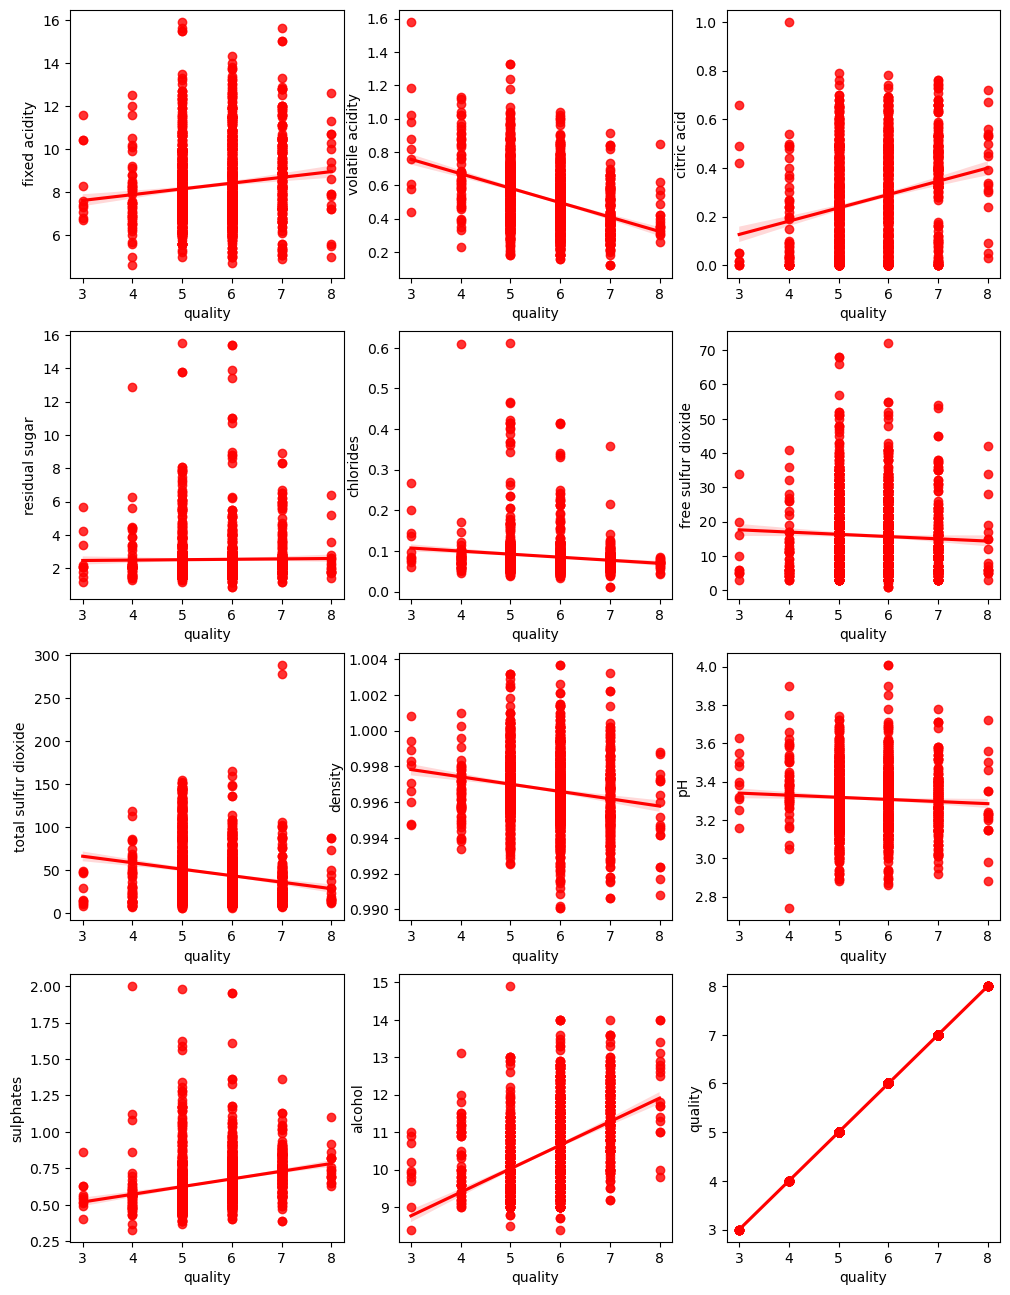

In [8]:
plt.figure(figsize=(12,16))
p=1
for i in df:
    if p<=12:
        plt.subplot(4,3,p)
        sns.regplot(x='quality',y=i,data=df,color='r')
        #sns.lmplot(x='quality',y=i,data=df,palette='colorblind')
        plt.xlabel("quality")
        plt.ylabel(i)
    p+=1
plt.show()

###  above graphs shows correlation of all features vs target variable- so we can see residual sugar,chlorides,free sulfar dioxide and ph has not visibly much impact on quality

### volatile acidity, citric acid,sulphate and alchohol has major impact on it
### fixed acidity and total sulfar dixide has average impact

In [10]:
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


quality score 5 and 6 has majority

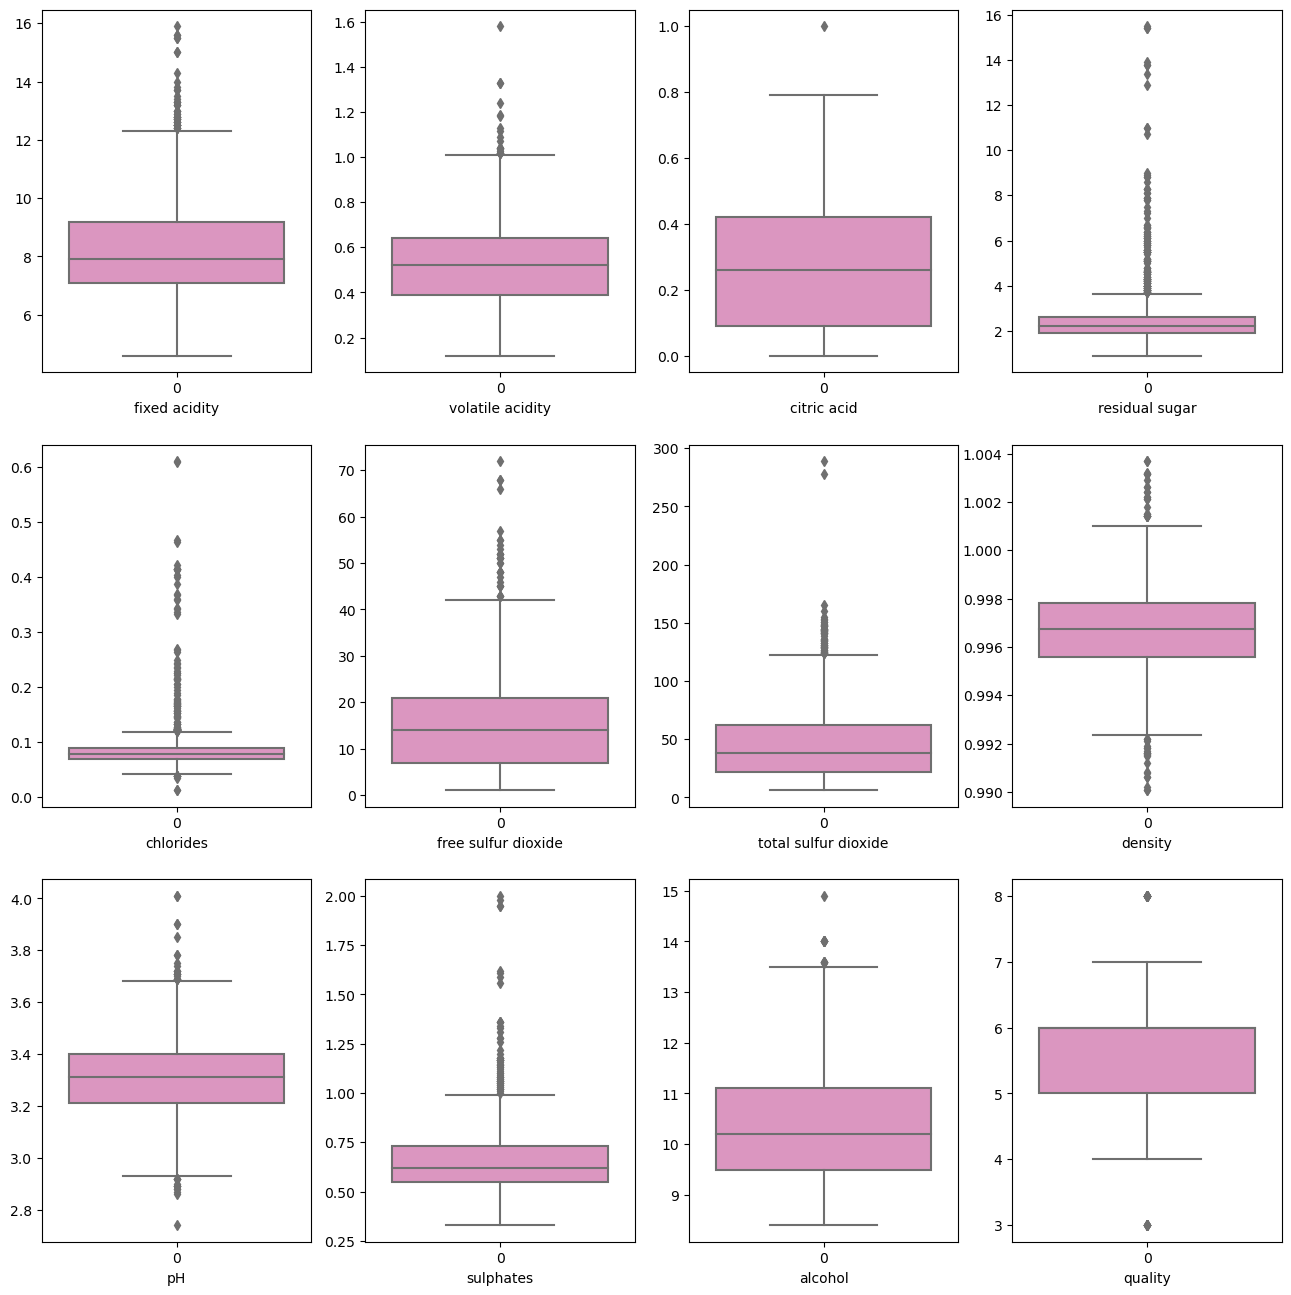

In [12]:
plt.figure(figsize=(16,16))
n=1
for i in df:
    if n<=12:
        plt.subplot(3,4,n)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

<Axes: >

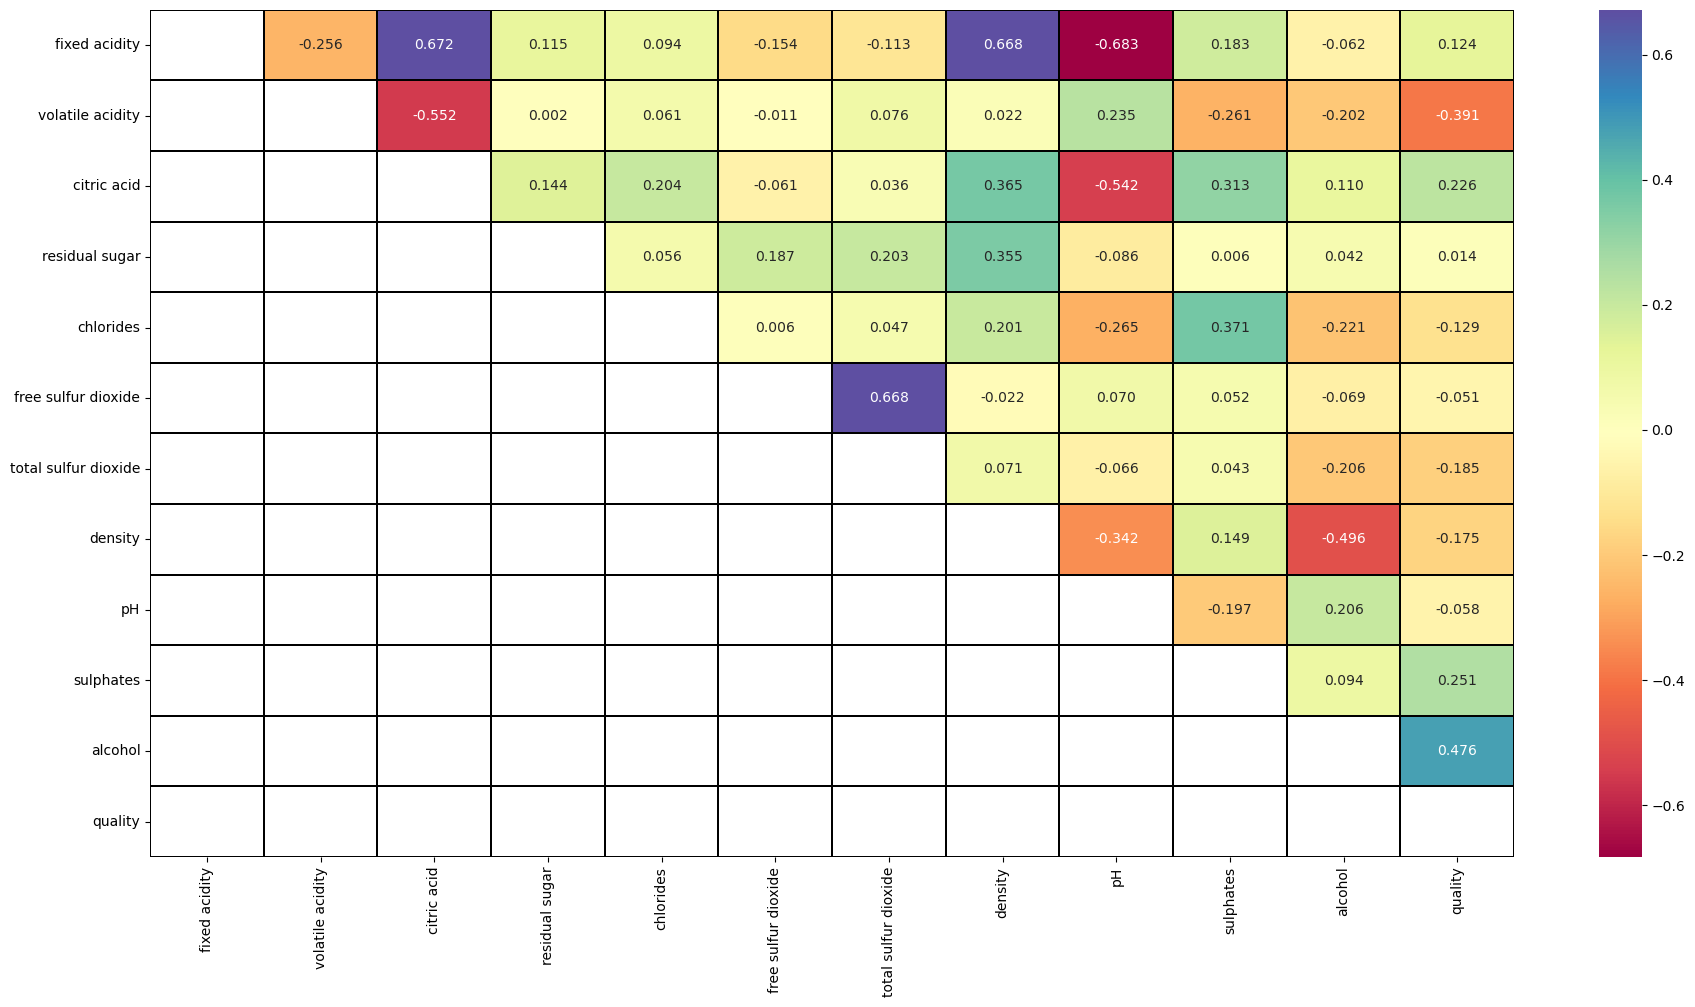

In [18]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(22,11))
sns.heatmap(df.corr(),annot=True,fmt='0.3f',linewidth=0.2,linecolor='black',cmap='Spectral',mask=lower_triangle)

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the quality and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly all the other positively and negatively correlated feature columns with respect to the target label

also  columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

#### by this above graphs we can say that free sulfur dioxide and total sulfur dioxide hase same impactand according to correlation with quality free sulfardioxide hase less impact on target so we are dropping it

In [24]:
df = df.drop('free sulfur dioxide',axis=1)

In [25]:
df.shape

(1599, 11)

In [26]:
#removing outliers now i have not include ph and density column because i think data is evenly 
#distributed there and no need to loss data
from scipy.stats import zscore
out_features=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','sulphates','alcohol']]
z=np.abs(zscore(out_features))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.624363,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.229047,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.411500,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.579207,0.960246
...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,0.075043,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,0.137820,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,0.196679,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,0.075043,0.305990,0.209308


In [27]:
df = df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
np.where(z>3)

(array([  13,   15,   17,   17,   19,   33,   38,   42,   43,   81,   81,
          83,   86,   88,   91,   92,  106,  106,  109,  120,  126,  127,
         142,  144,  147,  151,  151,  151,  163,  164,  169,  169,  181,
         199,  226,  226,  240,  243,  244,  258,  258,  274,  281,  291,
         324,  325,  339,  340,  347,  354,  374,  381,  391,  396,  400,
         442,  451,  467,  480,  494,  515,  544,  554,  555,  557,  568,
         588,  591,  595,  614,  636,  639,  649,  649,  651,  652,  652,
         652,  672,  672,  684,  690,  692,  692,  723,  724,  730,  754,
         776,  777,  795,  821,  911,  917,  923, 1043, 1051, 1051, 1071,
        1074, 1079, 1079, 1081, 1081, 1165, 1186, 1235, 1244, 1244, 1260,
        1269, 1270, 1288, 1289, 1299, 1312, 1319, 1319, 1367, 1370, 1370,
        1372, 1372, 1374, 1434, 1435, 1474, 1476, 1493, 1496, 1558, 1570,
        1574, 1589]),
 array([6, 5, 4, 6, 4, 3, 1, 4, 6, 4, 6, 4, 6, 6, 6, 6, 4, 6, 5, 1, 1, 1,
        7, 7, 4,

### 1485 rows present now after removing outliers

###  now splitting feature and lable data in X and Y

In [29]:
x = df.drop('quality',axis=1)
y = df['quality']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (1485, 10)
label Dimension (1485,)


In [30]:
# as there is mostly quality values are 5 and 6 in row we need to fix it using over sampling method
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x, y)

In [31]:
y.value_counts()

5    625
6    625
7    625
4    625
8    625
3    625
Name: quality, dtype: int64

### seting  an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [32]:
y = y.apply(lambda y_value:1 if y_value>=7 else 0) 
y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3745    1
3746    1
3747    1
3748    1
3749    1
Name: quality, Length: 3750, dtype: int64

In [34]:
#scaling feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.703721,0.795249,-1.491734,-0.651845,-0.289549,-0.053859,0.595243,1.396396,-0.749059,-1.075277
1,-0.451843,1.740638,-1.491734,0.083414,0.565136,1.260603,0.030368,-0.830482,0.181830,-0.722199
2,-0.451843,1.110378,-1.286551,-0.231697,0.332040,0.742785,0.143343,-0.399474,-0.050893,-0.722199
3,1.689125,-1.410659,1.380828,-0.651845,-0.328398,0.981778,0.708218,-1.117822,-0.593911,-0.722199
4,-0.703721,0.795249,-1.491734,-0.651845,-0.289549,-0.053859,0.595243,1.396396,-0.749059,-1.075277
...,...,...,...,...,...,...,...,...,...,...
3745,-0.010114,-0.460355,0.422219,-0.830707,-0.520377,1.729347,-1.669116,-0.991894,0.295927,1.373870
3746,1.242640,-1.125354,1.012476,2.169400,-0.461735,-0.833289,0.374404,-0.889318,0.638317,1.075136
3747,0.345729,-0.773382,1.035358,-0.756882,-0.491582,-0.781482,-1.180681,-0.691461,0.259404,1.613900
3748,2.098469,-1.202036,1.909485,-0.365909,-0.531270,-0.253020,0.791408,-2.780029,1.203228,-0.538320


In [35]:
#here i am checking accuracy of randomforestclassifier model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0
for i in range(1,111):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)# training model
    pred = RFR.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i# setting best random state for higher accuracy
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.9662222222222222 at random_state 37


## from above code we can say i am getting best accuracy at random state 37

In [52]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
# creating one function for various classification model
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)
    model.fit(x_train,y_train)# Training the model
    pred = model.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    print("accuracy score",acc)
    print("classification_report",classification_report(y_test,pred))
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [53]:
#logistic regression
model=LogisticRegression()
classify(model,x,y)

accuracy score 0.924
classification_report               precision    recall  f1-score   support

           0       0.95      0.93      0.94       488
           1       0.88      0.91      0.89       262

    accuracy                           0.92       750
   macro avg       0.91      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750

Cross Validation Score: 0.8959999999999999

Accuracy Score - Cross Validation Score is 0.028000000000000136


In [54]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=37)
classify(model, x, y)

accuracy score 0.9493333333333334
classification_report               precision    recall  f1-score   support

           0       0.97      0.95      0.96       488
           1       0.91      0.94      0.93       262

    accuracy                           0.95       750
   macro avg       0.94      0.95      0.94       750
weighted avg       0.95      0.95      0.95       750

Cross Validation Score: 0.9199999999999999

Accuracy Score - Cross Validation Score is 0.029333333333333433


In [55]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=37)
classify(model,x,y)

accuracy score 0.9706666666666667
classification_report               precision    recall  f1-score   support

           0       0.98      0.97      0.98       488
           1       0.95      0.97      0.96       262

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750

Cross Validation Score: 0.9360000000000002

Accuracy Score - Cross Validation Score is 0.03466666666666651


In [48]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x,y)

accuracy score 0.9706666666666667
classification_report               precision    recall  f1-score   support

           0       0.98      0.97      0.98       488
           1       0.95      0.97      0.96       262

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750

Cross Validation Score: 0.9461333333333334

Accuracy Score - Cross Validation Score is 0.024533333333333296


In [49]:
#GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model,x,y)

accuracy score 0.952
classification_report               precision    recall  f1-score   support

           0       0.96      0.96      0.96       488
           1       0.93      0.93      0.93       262

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

Cross Validation Score: 0.9194666666666667

Accuracy Score - Cross Validation Score is 0.0325333333333333


In [50]:
#AdaBoostClassifier
model=AdaBoostClassifier()
classify(model,x,y)

accuracy score 0.9253333333333333
classification_report               precision    recall  f1-score   support

           0       0.95      0.94      0.94       488
           1       0.88      0.90      0.89       262

    accuracy                           0.93       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.93      0.93      0.93       750

Cross Validation Score: 0.9050666666666667

Accuracy Score - Cross Validation Score is 0.020266666666666655


In [51]:
#BaggingClassifier
model=BaggingClassifier()
classify(model,x,y)

accuracy score 0.9546666666666667
classification_report               precision    recall  f1-score   support

           0       0.96      0.97      0.97       488
           1       0.95      0.92      0.93       262

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

Cross Validation Score: 0.9328

Accuracy Score - Cross Validation Score is 0.0218666666666667


### after comparing all classifier i am choosing AdaBoostClasssifier because has least differenceAccuracy Score  and Cross Validation Score

## Hyper Paremeter tunig

In [66]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators' : [50, 70, 90, 120, 180, 200],'learning_rate' : [0.001, 0.01, 0.1, 1, 10]}

In [67]:
GSCV = GridSearchCV(AdaBoostClassifier(),param, cv=5)

In [68]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]})

In [70]:
GSCV.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [76]:
Final_Model = AdaBoostClassifier(learning_rate=1,n_estimators=200)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 92.44444444444444


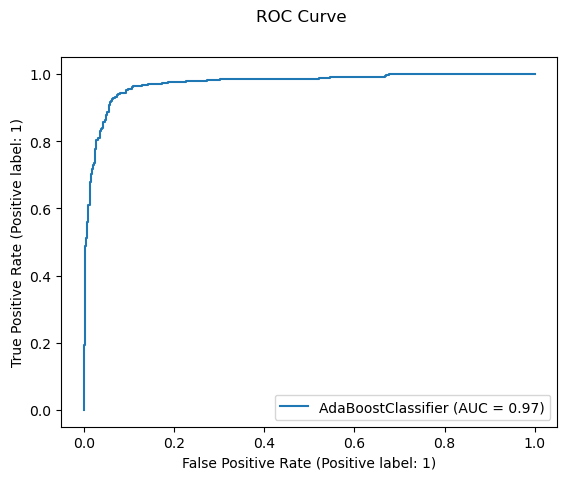

In [100]:
!pip install --upgrade scikit-learn
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(Classifier,x_test,y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

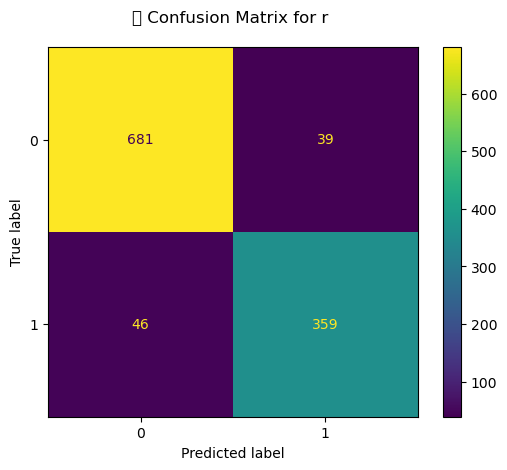

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = df.columns
ConfusionMatrixDisplay.from_estimator(Classifier,x_test,y_test)
plt.title('\t Confusion Matrix for r \n')
plt.show()

Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv
![image.png](attachment:image.png)

In [117]:
df1= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [119]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [120]:
# number of unique values and its count in each column
for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

from above values it seemes like there is not much of imbalance in most columns for value counts

In [121]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [122]:
# we can see by describe method we can only see numerical data hence for more detail of data we 
#can convert smoker and sex data in numeric data
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df1 = df1.copy()
df1.replace(clean_data, inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [123]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### it seemes like  data is well distributed not much of outliers and skewness are there

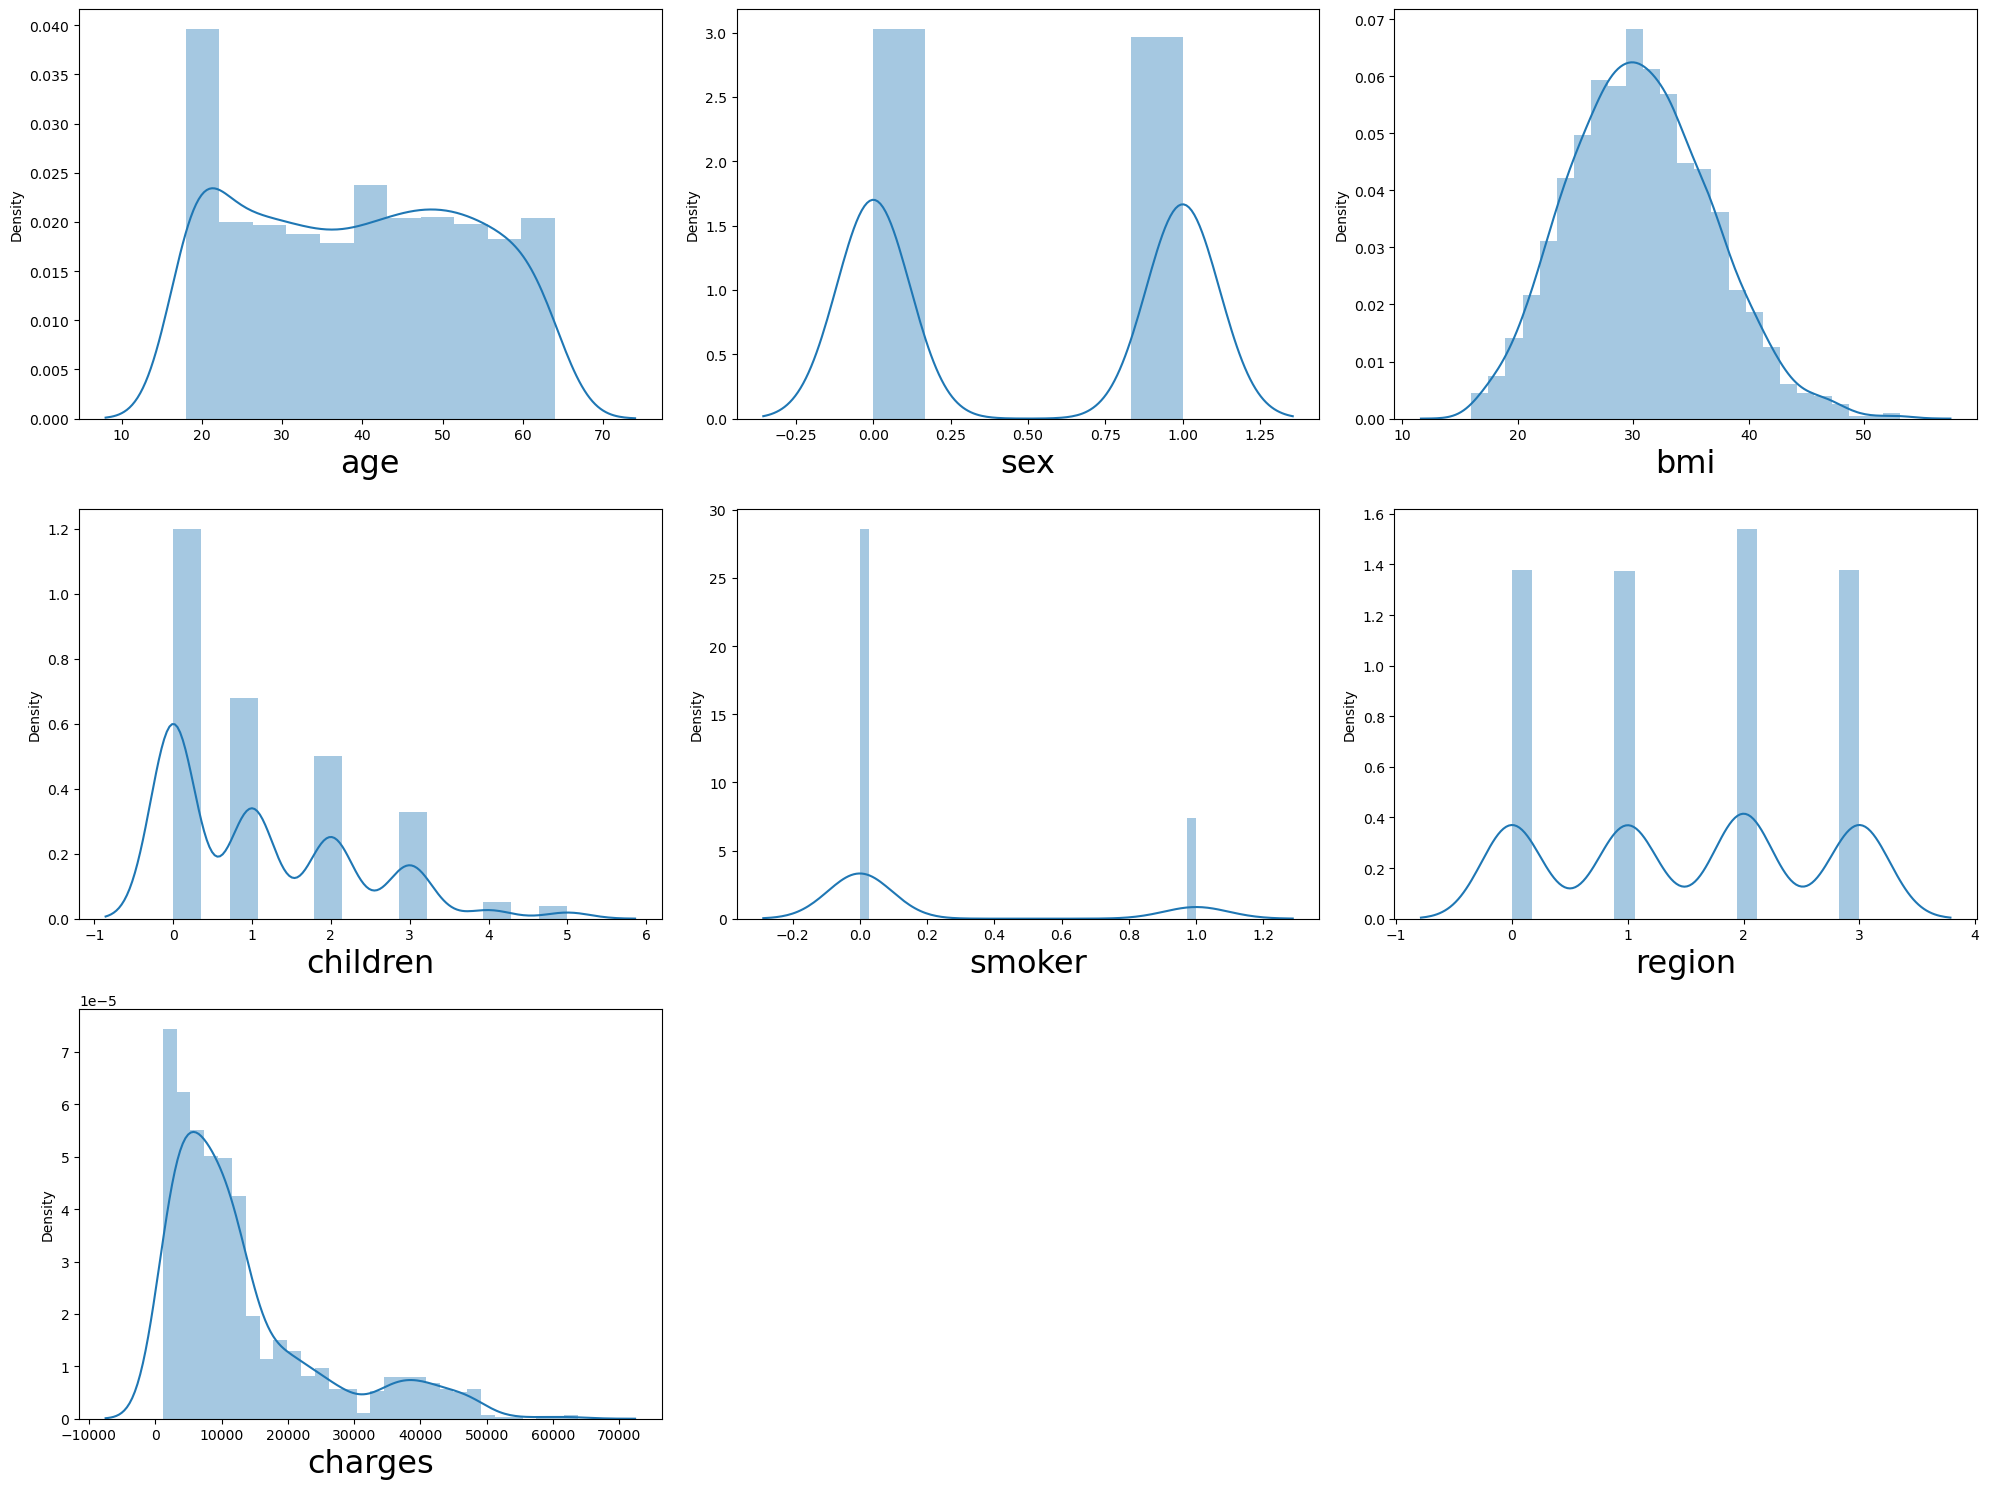

In [124]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=23)
    plotnumber+=1
plt.tight_layout()

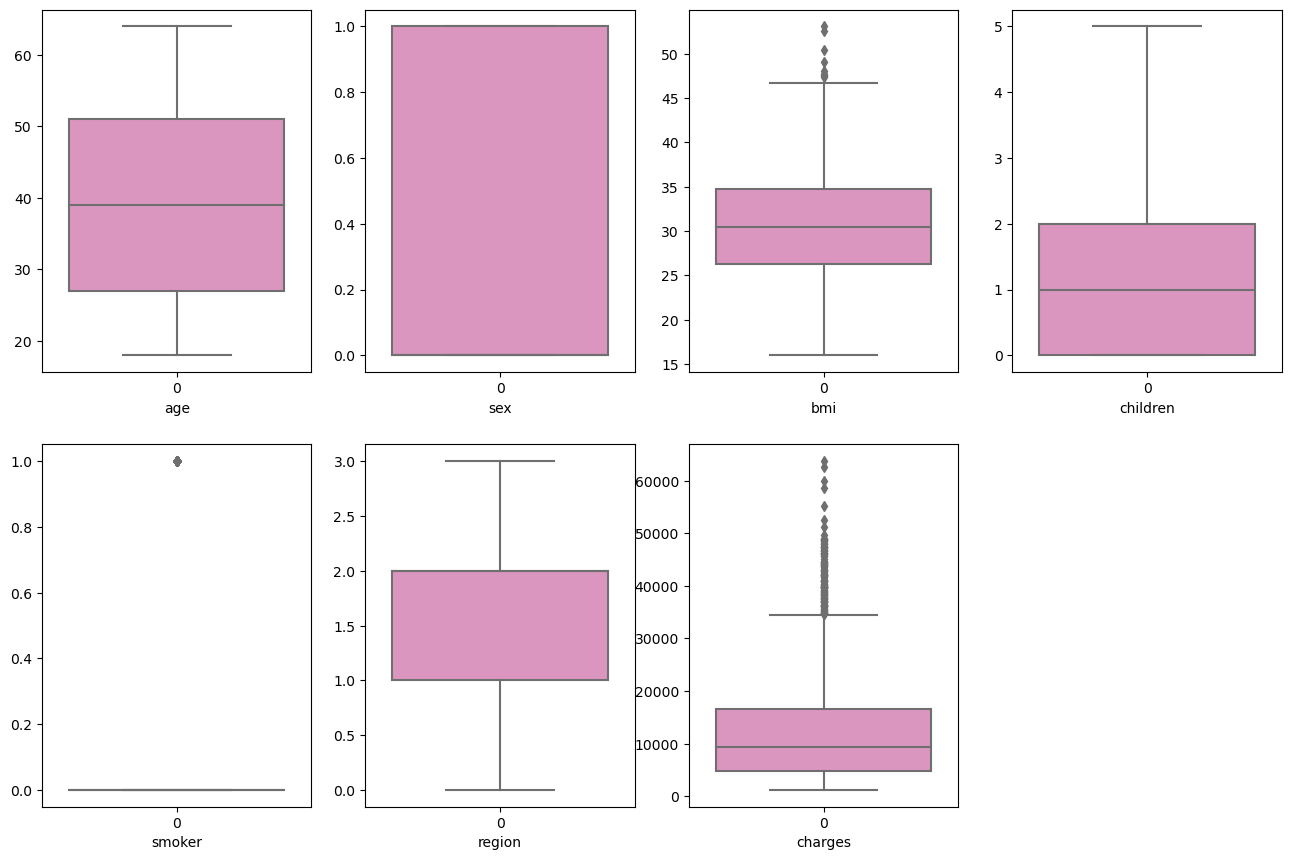

In [125]:
plt.figure(figsize=(16,16))
n=1
for i in df1:
    if n<=12:
        plt.subplot(3,4,n)
        sns.boxplot(df1[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

as we can see there is some outliers are there in bmi column we dont see charges column as it is our target variable

In [126]:
from scipy.stats import zscore
out_features=df1['bmi']
z=np.abs(zscore(out_features))
z

0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64

In [127]:
np.where(z>3)

(array([ 116,  847, 1047, 1317]),)

In [131]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [141]:
df1 = df1[(z<3)]
df1.shape

(1334, 7)

In [143]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.233883,0.496252,30.601555,1.096702,0.204648,1.513493,13265.622751
std,14.034654,0.500173,6.000927,1.206548,0.403595,1.106910,12089.666548
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.237500,0.000000,0.000000,1.000000,4746.521225
50%,39.000000,0.000000,30.332500,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.595000,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,48.070000,5.000000,1.000000,3.000000,63770.428010


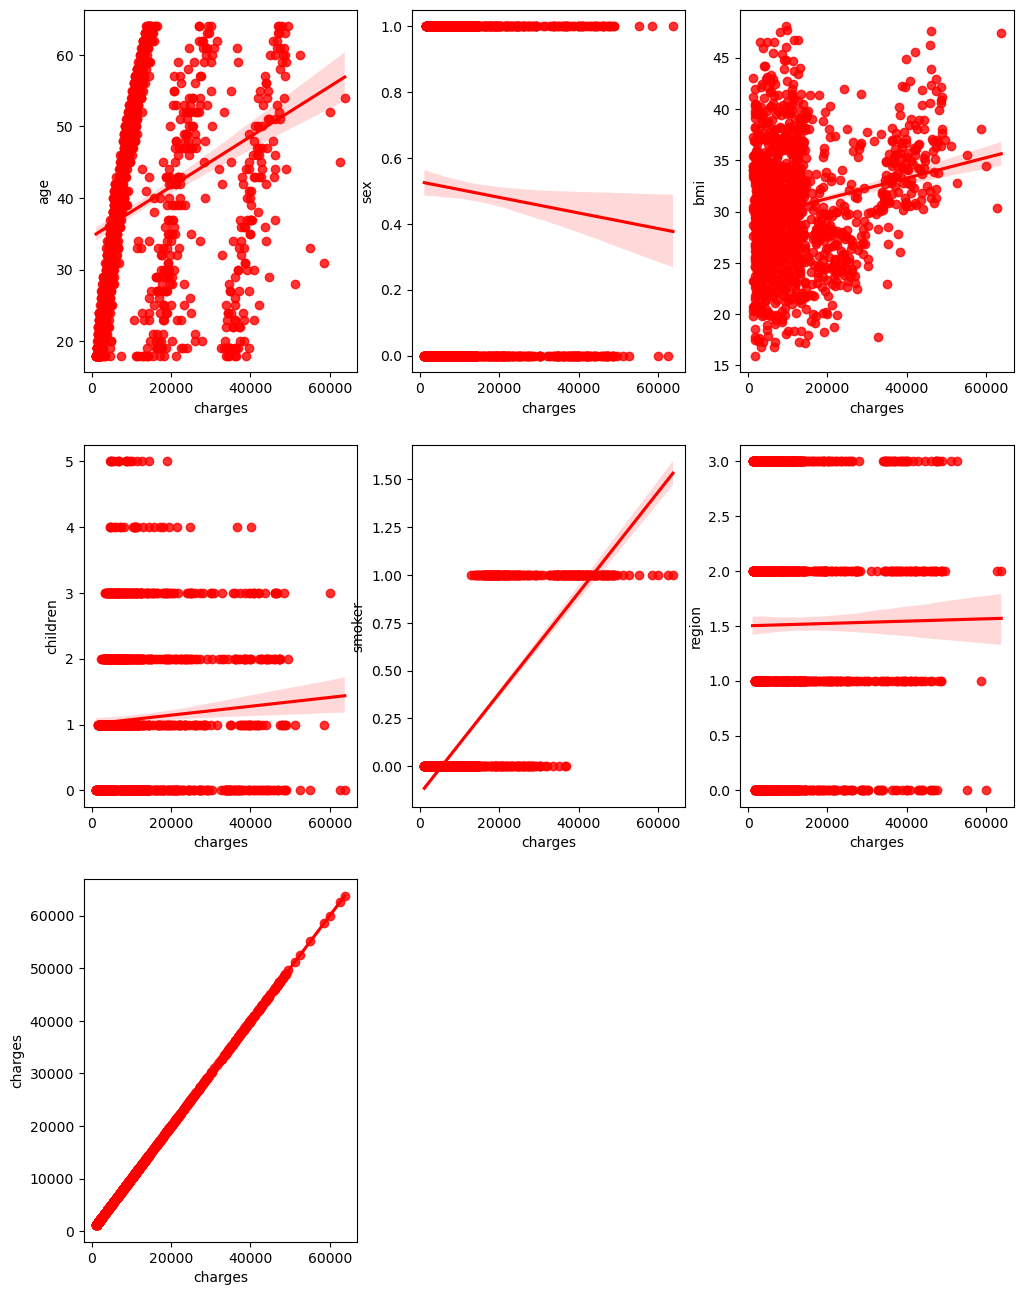

In [145]:
plt.figure(figsize=(12,16))
p=1
for i in df1:
    if p<=12:
        plt.subplot(3,3,p)
        sns.regplot(x='charges',y=i,data=df1,color='r')
        #sns.lmplot(x='quality',y=i,data=df,palette='colorblind')
        plt.xlabel("charges")
        plt.ylabel(i)
    p+=1
plt.show()

## feature selection
we can see our target variable is highly dependent on age and smoking status there is not much impact of region and children column so we can drop region column

In [146]:
df1 = df1.drop('region',axis=1)

In [147]:
df1

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [150]:
#scaling feature data
x1 = df1.drop('charges',axis=1)
y1 = df1['charges']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (1334, 5)
label Dimension (1334,)


In [151]:
#scaling feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x1

,age,sex,bmi,children,smoker
0,-1.442249,1.007525,-0.450359,-0.909299,1.971407
1,-1.513528,-0.992532,0.528191,-0.080177,-0.507252
2,-0.800739,-0.992532,0.399829,1.578066,-0.507252
3,-0.444344,-0.992532,-1.316383,-0.909299,-0.507252
4,-0.515623,-0.992532,-0.286989,-0.909299,-0.507252
...,...,...,...,...,...
1329,0.767397,-0.992532,0.061421,1.578066,-0.507252
1330,-1.513528,1.007525,0.219789,-0.909299,-0.507252
1331,-1.513528,1.007525,1.041637,-0.909299,-0.507252
1332,-1.299692,1.007525,-0.800436,-0.909299,-0.507252


In [166]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2, random_state=11)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [167]:
linear_reg = LinearRegression()
linear_reg.fit(X1_train, y1_train)

LinearRegression()

In [168]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

LinearRegression()

In [169]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = x1, y = y1, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X1_train)
r2_score_linear_reg_train = r2_score(y1_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X1_test)
r2_score_linear_reg_test = r2_score(y1_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y1_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.743
R2_score (train) : 0.744
R2_score (test) : 0.773
RMSE : 5695.547


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.